In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [13]:
# active seaborn theme for matplotlib
sns.set_theme()

In [14]:
data = pd.read_csv('./open-meteo.clean.csv')

In [15]:
data_len = len(data[data.columns[0]])
feature_len = data.columns.size - 1

print(data_len)
print(feature_len)

9373
31


In [16]:
target = data['weather_code']
X = data.drop("weather_code", axis=1)
feature_names = data.columns.array
feature_names = feature_names[1:]

#target.drop(index=0,axis=0)
#X.drop(index=(len(X)-1), axis=0)

le = LabelEncoder()
y = le.fit_transform(target)

y_index = np.array(list(set(y)))
y_label = le.inverse_transform(y_index)
y_label = [str(item).zfill(2) for item in y_label]

print(y_index)
print(y_label)

[0 1 2 3 4 5 6 7 8 9]
['00', '01', '02', '03', '51', '53', '55', '61', '63', '65']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

st_scaler = StandardScaler()

# scaler fit và transform trên tập train
X_train_st = st_scaler.fit_transform(X_train)

# scaler chỉ transform trên tập test, không được fit
X_test_st = st_scaler.transform(X_test)

In [18]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train_st, y_train)
y_pred_original = model1.predict(X_test_st)

In [19]:
print(f'accuracy_score: {metrics.accuracy_score(y_test, y_pred_original)}')
print(f'f1_score: {metrics.f1_score(y_test, y_pred_original, average='weighted')}')

accuracy_score: 0.7605333333333333
f1_score: 0.7379779202028232


In [20]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_st)
X_test_pca = pca.transform(X_test_st)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train)

y_pred_pca = model.predict(X_test_pca)

In [21]:
print(f'accuracy_score: {metrics.accuracy_score(y_test, y_pred_pca)}')
print(f'f1_score: {metrics.f1_score(y_test, y_pred_pca, average='weighted')}')

accuracy_score: 0.5861333333333333
f1_score: 0.5493527276568351


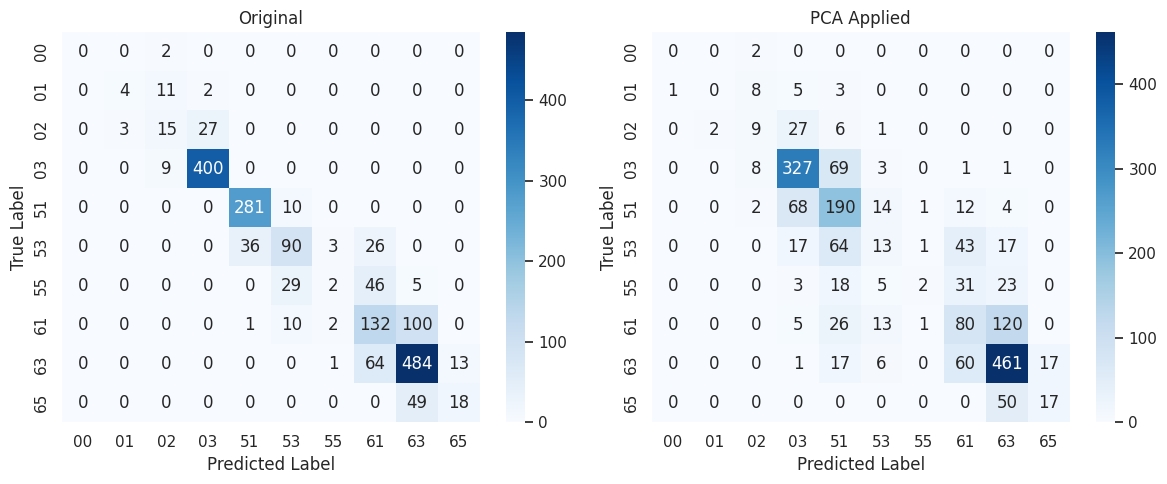

In [22]:
cm1 = confusion_matrix(y_test, y_pred_original)
cm2 = confusion_matrix(y_test, y_pred_pca)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=y_label, yticklabels=y_label, ax=axs[0])
axs[0].set_title("Original")
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=y_label, yticklabels=y_label, ax=axs[1])
axs[1].set_title("PCA Applied")
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

Nhận xét:
- Giảm chiều dữ liệu bằng PCA trên tập dữ liệu này không giúp cải thiện mô hình